<a href="https://colab.research.google.com/github/asmaamuhamed20/teeth-classification/blob/main/teeth_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###   Load and Prepare Dataset

In [2]:
!pip install -q gdown

In [3]:
import gdown

file_id = "1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY"
output = "teeth_dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=c2dc42ae-ea29-4775-bb4e-490854bef4a9
To: /content/teeth_dataset.zip
100%|██████████| 49.1M/49.1M [00:00<00:00, 101MB/s]


'teeth_dataset.zip'

In [4]:
import zipfile

extract_path = "/content/teeth_dataset"

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted")

Extracted


In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import os

In [6]:
print(os.listdir(extract_path))

['Teeth_Dataset']


In [7]:
train_dir = "/content/teeth_dataset/Teeth_Dataset/Training"
val_dir   = "/content/teeth_dataset/Teeth_Dataset/Validation"
test_dir  = "/content/teeth_dataset/Teeth_Dataset/Testing"

###   Build & Train Basic CNN Model




In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [15]:
import shutil

test_dir = "/content/teeth_dataset/Teeth_Dataset/Testing"
wanted = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

for cls in os.listdir(test_dir):
    path = os.path.join(test_dir, cls)
    if cls not in wanted and os.path.isdir(path):
        shutil.rmtree(path)
        print(f"Deleted: {cls}")

Deleted: out
Deleted: output
Deleted: outputs


In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [24]:
num_classes = len(class_names)
print(num_classes)

7


In [21]:
import tensorflow as tf

train_count = train_ds.cardinality().numpy() * 32
val_count = val_ds.cardinality().numpy() * 32
test_count = test_ds.cardinality().numpy() * 32

print(f"{train_count}")
print(f" {val_count}")
print(f" {test_count}")

3104
 1056
 1056


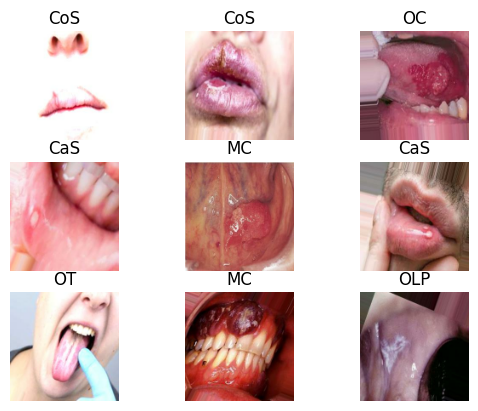

In [19]:
plt.Figure(figsize= (8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')


In [20]:
from tensorflow.keras import layers, models


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)

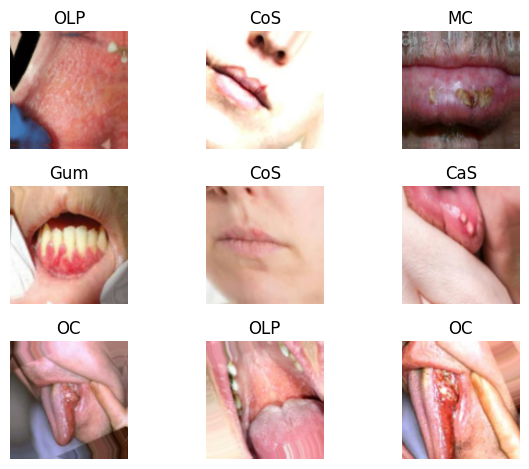

In [22]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
from tensorflow.keras import layers, models


num_classes = 7

model = keras.Sequential([

    data_augmentation,

    #normalization
    layers.Rescaling(1./255, input_shape = (128, 128, 3)),

    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256,(3,3), activation= 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),

    layers.Dropout(0.5),

    layers.Dense(num_classes, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    # callbacks = [early_stop]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9779 - loss: 0.0800 - val_accuracy: 0.9767 - val_loss: 0.1171
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9758 - loss: 0.0694 - val_accuracy: 0.9767 - val_loss: 0.1042
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9803 - loss: 0.0621 - val_accuracy: 0.9747 - val_loss: 0.1040
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9776 - val_loss: 0.0966
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9796 - val_loss: 0.1050
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9843 - loss: 0.0528 - val_accuracy: 0.9718 - val_loss: 0.1037
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9786 - val_loss: 0.0887
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9841 - loss: 0.0527 - val_accuracy: 0.

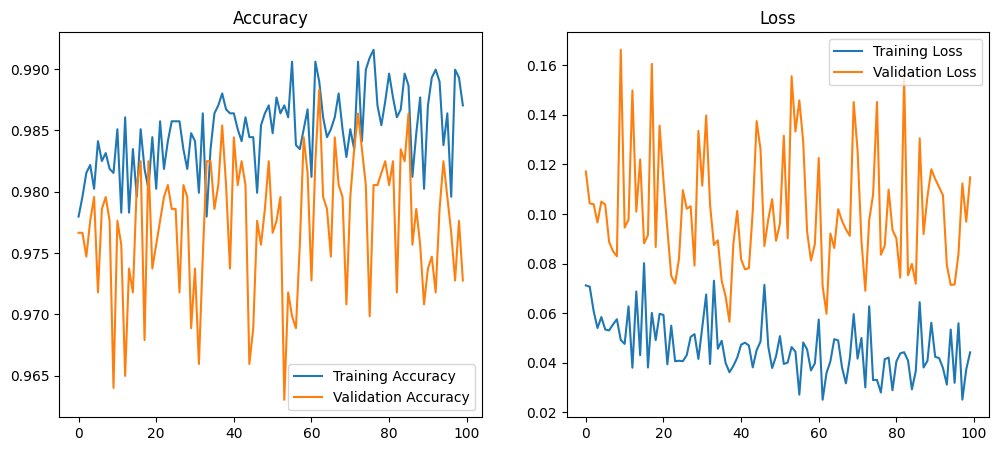

In [51]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    patience = 5,
    restore_best_weights = True
)

In [53]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    callbacks = [early_stop]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9881 - loss: 0.0347 - val_accuracy: 0.9786 - val_loss: 0.0715
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9871 - loss: 0.0345 - val_accuracy: 0.9825 - val_loss: 0.0668
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9845 - loss: 0.0390 - val_accuracy: 0.9854 - val_loss: 0.0522
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9939 - loss: 0.0243 - val_accuracy: 0.9660 - val_loss: 0.1938
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9840 - loss: 0.0442 - val_accuracy: 0.9718 - val_loss: 0.1204
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9885 - loss: 0.0333 - val_accuracy: 0.9708 - val_loss: 0.1152
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9921 - loss: 0.0222 - val_accuracy: 0.9786 - val_loss: 0.0883
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9912 - loss: 0.0334 - val_accuracy: 0.

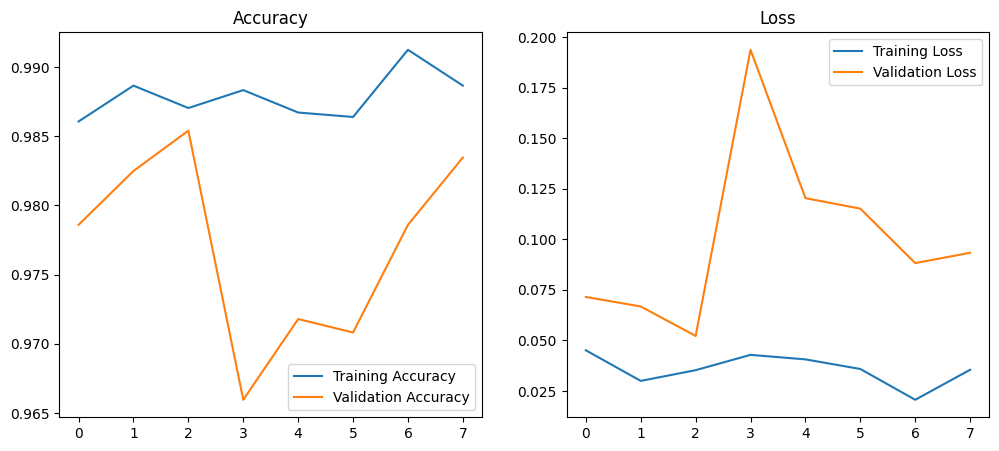

In [54]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [55]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.0639
Test Accuracy: 0.9835
Test Loss: 0.0868


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 126, 126, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 63, 63, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 61, 61, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 12, 12, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 6, 6, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 9216)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 7)                │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,707,287 (17.96 MB)

 Trainable params: 1,569,095 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,138,192 (11.97 MB)

### pretrain model Fine-tuning

In [45]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam

# loading pretrain model without first layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print(len(base_model.layers)) # numbers of layers

175


In [22]:
base_model.trainable = False


In [36]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


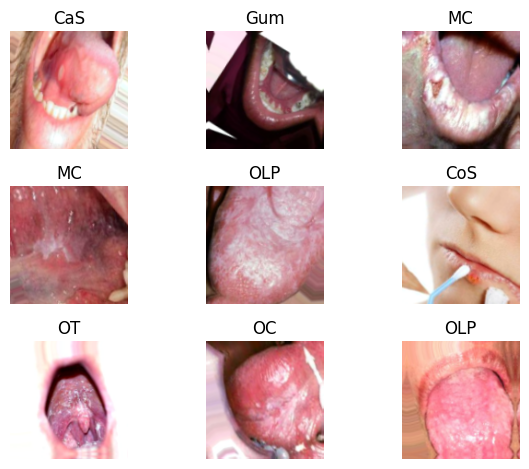

In [37]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [46]:

inputs = tf.keras.Input(shape=(128,128,3))
x = preprocess_input(inputs)      # normalization
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [53]:
model.compile(optimizer= Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
base_model.trainable = True

In [55]:
for layer in base_model.layers[:-40]:
    layer.trainable = False        #  train 40 layers

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 1.0000 - loss: 1.1424e-04 - val_accuracy: 0.9864 - val_loss: 0.0447
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 1.0000 - loss: 9.6482e-05 - val_accuracy: 0.9854 - val_loss: 0.0454
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 1.0000 - loss: 1.1996e-04 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 1.0000 - loss: 6.7461e-05 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 1.0000 - loss: 5.1860e-05 - val_accuracy: 0.9854 - val_loss: 0.0454
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 1.0000 - loss: 6.3941e-05 - val_accuracy: 0.9844 - val_loss: 0.0454
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 1.0000 - loss: 6.7503e-05 - val_accuracy: 0.9844 - val_loss: 0.0454
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 1.0000 - loss: 5.9

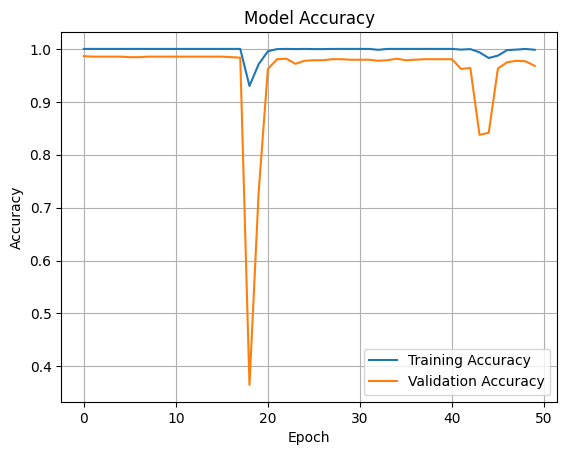

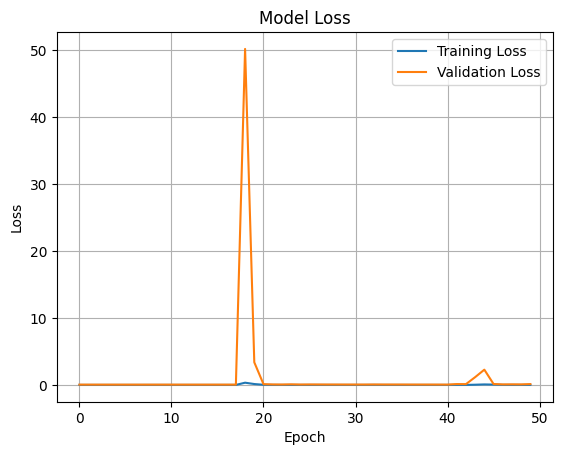

In [60]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9852 - loss: 0.0588
Test Accuracy: 0.9835


In [61]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │        14,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,294,359 (210.93 MB)

 Trainable params: 15,846,151 (60.45 MB)

 Non-trainable params: 7,755,904 (29.59 MB)

 Optimizer params: 31,692,304 (120.90 MB)

In [100]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
test_folder = '/content/drive/My Drive/test_imges'

In [122]:
def load_and_prepare_image(local_path):
    img = load_img(local_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


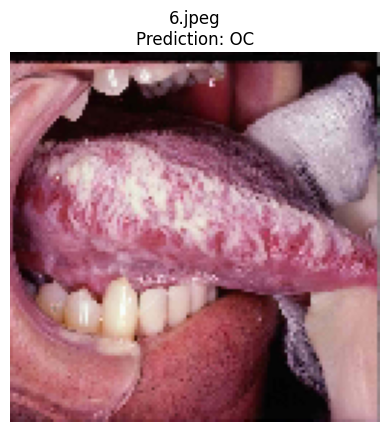

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


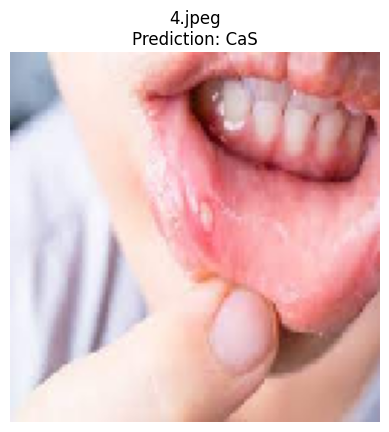

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


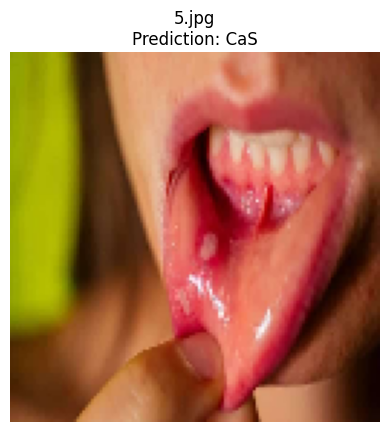

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


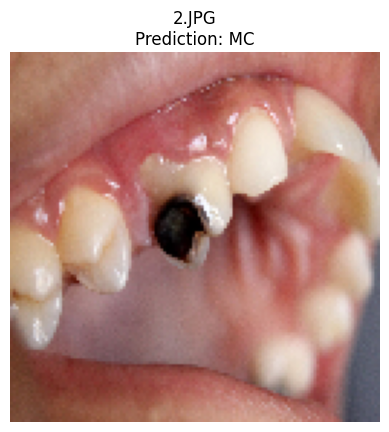

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


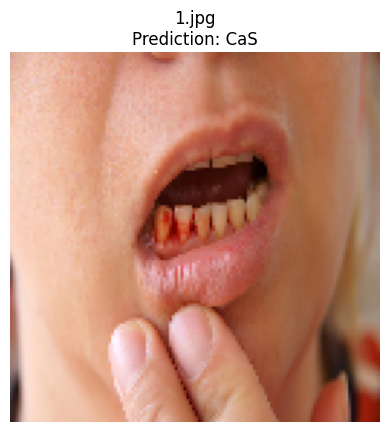

In [123]:
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(test_folder, filename)
        try:
            original_img, img_array = load_and_prepare_image(img_path)
            prediction = model.predict(img_array)
            pred_class = np.argmax(prediction)
            class_name = class_names[pred_class]

            plt.imshow(original_img)
            plt.axis('off')
            plt.title(f"{filename}\nPrediction: {class_name}")
            plt.show()

        except Exception as e:
            print(f"Error with {filename}: {e}")